# 6.3 Geographic visualization

In [1]:
# Importing the libraries that are going to be used and importing the DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
path = 'D:\Downloads\Data Analytics\TASK 6'

In [3]:
df = pd.read_csv(os.path.join(path,'df_clean2.csv'), index_col = False)

In [4]:
# Let's also import the JSON file that is going to be used for the Choropleths
country_geo = r'C:/Users/anegl/Task 6/Learning exercises/us-states.json'

In [5]:
df

,id,model year,manufacturer,model,cylinders,fuel,price,mileage,car conditions,transmission,car type,car colour,state,Date posted,mileage category,price category
0,7311936036,2017,mercedes-benz,amg g 63,8 cylinders,gas,990000,4085,clean,automatic,SUV,white,fl,24/04/2021,very low mileage,very expensive
1,7315966576,2019,unknown,f250 xlt crewcab,8 cylinders,gas,554900,25365,lien,automatic,pickup,white,mi,02/05/2021,low mileage,very expensive
2,7313051670,2016,unknown,Lambo Aventador SV Roadster,12 cylinders,gas,516999,9982,clean,automatic,convertible,white,fl,26/04/2021,very low mileage,very expensive
3,7303420900,2003,unknown,any and all,5 cylinders,diesel,400123,123321,clean,automatic,pickup,blue,pa,07/04/2021,high mileage,very expensive
4,7306488355,2020,ferrari,f8 tributo,8 cylinders,gas,349999,2800,clean,automatic,coupe,unknown,ca,13/04/2021,very low mileage,very expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325601,7302545770,2006,ford,f550,unknown,diesel,0,0,clean,other,other,white,il,06/04/2021,new,very cheap
325602,7302020815,2017,tesla,model 3,unknown,diesel,0,0,clean,automatic,sedan,unknown,tx,05/04/2021,new,very cheap
325603,7301605555,2019,lincoln,continental reserve automatic,unknown,gas,0,0,clean,automatic,sedan,blue,fl,04/04/2021,new,very cheap
325604,7301605525,2020,ford,f-150 lariat 4wd supercrew automatic,unknown,gas,0,0,clean,automatic,pickup,white,fl,04/04/2021,new,very cheap


In [6]:
# As we can see, the state column shows an abreviation of the state name, so it needs to be replaced
# We have two options, change the JSON file we are going to use, or rename the states
# As it will be easier and better for the future, let's rename the information in the columns

In [7]:
df.loc[df['state'] == 'al', 'state'] = 'Alabama'
df.loc[df['state'] == 'ak', 'state'] = 'Alaska'
df.loc[df['state'] == 'az', 'state'] = 'Arizona'
df.loc[df['state'] == 'ar', 'state'] = 'Arkansas'
df.loc[df['state'] == 'ca', 'state'] = 'California'
df.loc[df['state'] == 'co', 'state'] = 'Colorado'
df.loc[df['state'] == 'ct', 'state'] = 'Connecticut'
df.loc[df['state'] == 'de', 'state'] = 'Delaware'
df.loc[df['state'] == 'dc', 'state'] = 'District of Columbia'
df.loc[df['state'] == 'fl', 'state'] = 'Florida'
df.loc[df['state'] == 'ga', 'state'] = 'Georgia'
df.loc[df['state'] == 'hi', 'state'] = 'Hawaii'
df.loc[df['state'] == 'ia', 'state'] = 'Iowa'
df.loc[df['state'] == 'id', 'state'] = 'Idaho'
df.loc[df['state'] == 'il', 'state'] = 'Illinois'
df.loc[df['state'] == 'in', 'state'] = 'Indiana'
df.loc[df['state'] == 'ks', 'state'] = 'Kansas'
df.loc[df['state'] == 'ky', 'state'] = 'Kentucky'
df.loc[df['state'] == 'la', 'state'] = 'Louisiana'
df.loc[df['state'] == 'ma', 'state'] = 'Massachusetts'
df.loc[df['state'] == 'md', 'state'] = 'Maryland'
df.loc[df['state'] == 'me', 'state'] = 'Maine'
df.loc[df['state'] == 'mi', 'state'] = 'Michigan'
df.loc[df['state'] == 'mn', 'state'] = 'Minnesota'
df.loc[df['state'] == 'mo', 'state'] = 'Missouri'
df.loc[df['state'] == 'ms', 'state'] = 'Mississippi'
df.loc[df['state'] == 'mt', 'state'] = 'Montana'
df.loc[df['state'] == 'nc', 'state'] = 'North Carolina'
df.loc[df['state'] == 'nd', 'state'] = 'North Dakota'
df.loc[df['state'] == 'ne', 'state'] = 'Nebraska'
df.loc[df['state'] == 'nh', 'state'] = 'New Hampshire'
df.loc[df['state'] == 'nj', 'state'] = 'New Jersey'
df.loc[df['state'] == 'nm', 'state'] = 'New Mexico'
df.loc[df['state'] == 'nv', 'state'] = 'Nevada'
df.loc[df['state'] == 'ny', 'state'] = 'New York'
df.loc[df['state'] == 'oh', 'state'] = 'Ohio'
df.loc[df['state'] == 'ok', 'state'] = 'Oklahoma'
df.loc[df['state'] == 'or', 'state'] = 'Oregon'
df.loc[df['state'] == 'pa', 'state'] = 'Pennsylvania'
df.loc[df['state'] == 'ri', 'state'] = 'Rhode Island'
df.loc[df['state'] == 'sc', 'state'] = 'South Carolina'
df.loc[df['state'] == 'sd', 'state'] = 'South Dakota'
df.loc[df['state'] == 'tn', 'state'] = 'Tennessee'
df.loc[df['state'] == 'tx', 'state'] = 'Texas'
df.loc[df['state'] == 'ut', 'state'] = 'Utah'
df.loc[df['state'] == 'va', 'state'] = 'Virginia'
df.loc[df['state'] == 'vt', 'state'] = 'Vermont'
df.loc[df['state'] == 'wa', 'state'] = 'Washington'
df.loc[df['state'] == 'wi', 'state'] = 'Wisconsin'
df.loc[df['state'] == 'wv', 'state'] = 'West Virginia'
df.loc[df['state'] == 'wy', 'state'] = 'Wyoming'

In [8]:
df['state'].value_counts(dropna=False)

California              39713
Florida                 22251
Texas                   16587
New York                15417
Ohio                    14128
Oregon                  13798
North Carolina          11351
Pennsylvania            11128
Washington              11094
Michigan                10667
Virginia                 8999
Colorado                 8433
Tennessee                8390
Wisconsin                8292
Idaho                    7495
Illinois                 7336
New Jersey               7109
Arizona                  6818
Massachusetts            6535
Iowa                     5825
Georgia                  5553
Minnesota                5375
Oklahoma                 4871
Montana                  4855
South Carolina           4716
Kansas                   4679
Indiana                  4385
Connecticut              4130
Maryland                 4013
Alabama                  3571
Kentucky                 3416
Missouri                 3291
New Mexico               3229
Alaska    

### Consistency check 

In [9]:
df.isnull().sum()
# In this case the data has been cleaned before, so no missing values are left
# They have been either replaced, or the entire row removed if the data could not be assumed.

id                  0
model year          0
manufacturer        0
model               0
cylinders           0
fuel                0
price               0
mileage             0
car conditions      0
transmission        0
car type            0
car colour          0
state               0
Date posted         0
mileage category    0
price category      0
dtype: int64

In [10]:
dups = df.duplicated()

In [11]:
dups.shape
# As we can see, no columns only the original number of rows.

(325606,)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

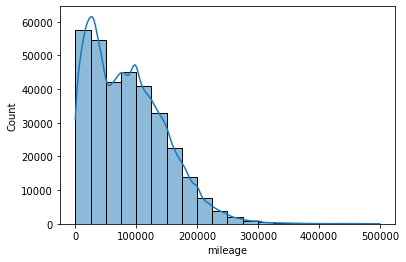

In [12]:
# Extreme values have also been cleared, mostly happened in mileage and price, so let's review it.
sns.histplot(df['mileage'], bins=20, kde = True) 

As we can see, it is really rare for the cars to have a mileage above 300.000 miles, most cars are up to 100.000

<AxesSubplot:xlabel='price', ylabel='Count'>

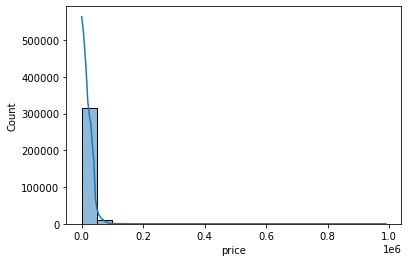

In [13]:
sns.histplot(df['price'], bins=20, kde = True) 

For the price, even though this may look unusual, it makes sense, as there are very few cars that would be extremely expensive, they are either relics, unique or exotic cars, like Lamborghinis and Ferraris, but the vast mojority is less than 150.00 (0.15)

### Choropleth map

In [14]:
# We begin by creating the dataframe we are going to use in the map. 
# Based on the hypothesis, lets focus on the State and the average price.
df1 = df.groupby('state')['price'].mean()

In [15]:
df1

state
Alabama                 20796.119294
Alaska                  24328.925950
Arizona                 20914.055588
Arkansas                19793.008026
California              17026.121043
Colorado                18942.689909
Connecticut             16117.908475
Delaware                17886.774436
District of Columbia    15186.755983
Florida                 18715.699160
Georgia                 19817.332433
Hawaii                  19218.486393
Idaho                   20469.946097
Illinois                16672.112595
Indiana                 20251.002965
Iowa                    15222.941459
Kansas                  18792.321222
Kentucky                20251.564110
Louisiana               20058.105288
Maine                   15732.510772
Maryland                18000.014702
Massachusetts           16971.257230
Michigan                17954.245242
Minnesota               16825.585860
Mississippi             17419.998462
Missouri                20814.344272
Montana                 23546.48

In [29]:
# Lets setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = df1,
    columns = ['state', ''],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

This map shows us which states have a higher average cost for cars.
One possible theory we can take, is that we could potentially buy cars from states where they color is a light green and sell it for a higher price where the color is a darker tone. Specially if they are close to each other, like Oregon and Washington.

In [17]:
# Lets also create a color map based on the number of available cars
df2 = df.groupby('state')['price'].count()

In [28]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = df2,
    columns = ['state', ''],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

While in this map we can see the states with more cars avaialable.

### Results interpretation

This results shows us more information about the data, and a better visualization, however since the hypothesis will be based on the car type in each state and that data was not used yet, as it is nominal data and the information so far was based on numeric data compared to the state.

We can however start to visualize where the prices are higher and where we can find more offers of cars, as this can be used to determine which states are great to buy cars, and which ones could be a potential selling market.

### Exporting data with new state names.

In [30]:
# Exporting data with new state names.
df.to_csv(os.path.join(path,'df_clean3.csv'))